In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Support vector classifier

In [3]:
# svm: max margin to obviously seperated data points

svm_model = SVC(kernel='linear').fit(X_train, y_train)

In [4]:
y_pred = svm_model.predict(X_test)

In [5]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [7]:
# svc_params = { 'C': np.arange(1,10), 'kernel': ['linear', 'rbf', 'poly']}

# svc = SVC()

# svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)

# svc_cv_model.fit(X_train, y_train)

In [8]:
## en iyi parametreler C:10 , gamma = 0.0001

In [9]:
svc_tuned = SVC(kernel="rbf", C=10, gamma=0.0001).fit(X_train, y_train)

In [11]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### support vector regression

In [12]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [16]:
from sklearn.svm import SVR
svr_model = SVR("linear").fit(X_train, y_train)

In [20]:
y_pred = svr_model.predict(X_train)

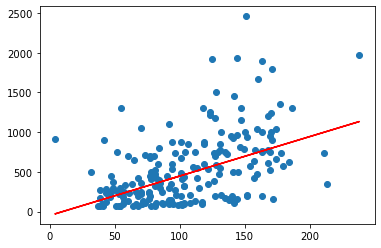

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="r")

In [23]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.8140954803348 + 5.17245613547069 x


Text(0, 0.5, 'Maaş(Salary)')

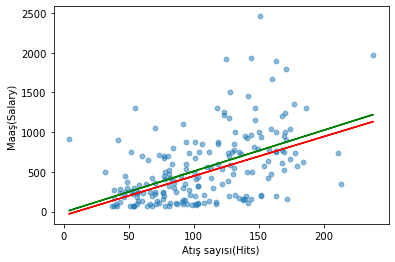

In [24]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

#### green line linear regression , red line SVM

### Tahmin

In [28]:
y_pred = svr_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

### model tuning

In [30]:
svr_params = {"C":np.arange(0.1, 2, 0.1)}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [32]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [34]:
svr_tuned = SVR("linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [35]:
y_pred = svr_tuned.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

### doğrusal olmayan  RBF

In [44]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

### Tahmin

In [46]:
y_pred = svr_rbf.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

### Model Tuning

In [48]:
svr_params = {"C": [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10,)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [49]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [50]:
svr_tuned = SVR("linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [51]:
y_pred = svr_tuned.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

409.64408768738764

## Naive Bayes

In [53]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [56]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [58]:
y_pred = nb_model.predict(X_test)

In [61]:
# 0 olma ihtimali, 1 olma ihtimali 
nb_model.predict_proba(X_test)[:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [62]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [63]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

### BernoulliNB

In [68]:
# 2 çıktı için yani binary targetler için yapılabilir.

In [69]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)

In [70]:
y_pred = bnb_model.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.6536796536796536

### MultinomialNB

In [75]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)

In [76]:
y_pred = mnb_model.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.6190476190476191

In [78]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.6101449275362318